# IMDB Score Final Project Classification Analysis

"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."
Jessica Davis

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Load Data

In [29]:
#Set Display Format
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [30]:
#remove warnings to keep dataset clean
import warnings
warnings.filterwarnings('ignore')

In [31]:
#Set Display Format
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [32]:
#read dataset
df = pd.read_csv('data/imdb_transformed')

In [33]:
#preview data
df.head(2)

,Unnamed: 0,duration,budget,imdb_score,G,PG,PG-13,R,Comedy,Drama,Thrill_Horror,Bio_Hist_Doc_War,actor_popularity,director_popularity
0,0,178.0,237000000.0,7.9,0,0,1,0,0,0,0,0,3,1
1,1,169.0,300000000.0,7.1,0,0,1,0,0,0,0,0,6,4


In [34]:
#drop unnecessary column
df = df.drop(['Unnamed: 0'], axis=1)

## Classification

## Different Classification Techniques

This project will use three different techniques that can be used to run classification analysis
* Decision Tree
* KNN
* Logistic

Because we are trying to classify data into categories, IMDB score needs to be made into different categories.

In [35]:
#create IMDB score categories
df['imdb_cat'] = 4
df['imdb_cat'][df['imdb_score'] > 8] = 4
df['imdb_cat'][(df['imdb_score'] >6 ) & (df['imdb_score'] < 8)] = 3
df['imdb_cat'][(df['imdb_score'] >4 ) & (df['imdb_score'] < 6)] = 2
df['imdb_cat'][df['imdb_score'] < 4] = 1

IMDB score categories
* less than 4: ok
* 4-6: bad
* 6-8: good
* 8-10 excellent

Because we are using imdb category as our y variable, we can drop IMDB score

In [36]:
df = df.drop(['imdb_score'], axis=1)

### Decision Tree

#### Run the Model

In [37]:
# declare X variables and y variable
y = df['imdb_cat']
X = df.drop(['imdb_cat'], axis=1)

We can use split validation to separate our data into different parts. This way we can test our model with our own data to see how well it predicts IMDB category

In [38]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
dt=DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
print len(X_train), len(y_train)
print len(X_test), len(y_test)

3033 3033
1300 1300


This model will use 3033 values to train and 1300 models to test

#### Model Evaluation

In [40]:
#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))


0.5453846153846154
--------------------------------------------------------
[[  4  24  20   2]
 [ 16 161 135   7]
 [ 17 190 515  77]
 [  0  22  81  29]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.11      0.08      0.09        50
          2       0.41      0.50      0.45       319
          3       0.69      0.64      0.66       799
          4       0.25      0.22      0.23       132

avg / total       0.55      0.55      0.55      1300



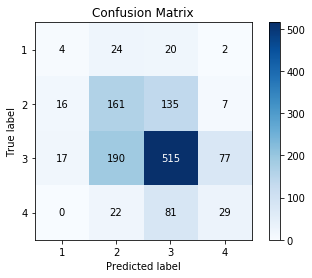

In [41]:
# visualize the results
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

#### Interpreting the results

* This model is only 54% accurate in predicting IMDB category
* The model was 9% sucessful in predicting a score below 4 (1)
* The model was 40% accurate in predicting a score between 4-6 (2)
* The model was 67% accurate at predicting a score between 6-8 (3)
* This model was 22% accurate in predicting a score above 8 (4)

You can see this accuracy and inaccuracy in teh confusion matrix above. The dark blue square above shows that the model was able to predict an accurate category of 3 505 scores. The model could only predict 4 of category 1. However, there are very few movies in the dataset with a score of one, so these results make sense. Most scores fall in btween category 2-3, which had a higher rate of correct prediction in this model.


#### Cross-Validation

Now the decision tree results can be assessed with 10-fold cross validation.

In [42]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(dt, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.52183908 0.45977011 0.54608295 0.56682028 0.57142857 0.51270208
 0.4665127  0.51963048 0.44779582 0.51508121]
0.5127663288388649


On average this model is 51% accurate when assesed wtih 10-fold cross-validation.

### Random Forest

Random forest models use multiple decision trees to develop a model,

In [43]:
#run random forest model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6261538461538462

This model has a 62.5% accuracy rate

#### generate evaluation metrics

In [44]:
#print evaluation results
print metrics.accuracy_score(y_test, clf.predict(X_test)) #overall accuracy
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))

0.6261538461538462
[[  2  28  20   0]
 [  6 146 166   1]
 [  3 132 654  10]
 [  1  15 104  12]]
             precision    recall  f1-score   support

          1       0.17      0.04      0.06        50
          2       0.45      0.46      0.46       319
          3       0.69      0.82      0.75       799
          4       0.52      0.09      0.15       132

avg / total       0.60      0.63      0.59      1300



* This model is 17% accurate in predicting category 1
* 45% accurate in predicting category 2
* 69% accurate in predicting category 3
* 52% accurate in predicting category 4

This model is significantly more accurate than the decision tree model.

### K-nearest Neighbors (KNN)

In [45]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#pip install scikit-plot (optional)
import scikitplot as skplt

#### Run the model

In [46]:
# split the model into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize KNeighborsClassifier() and train a KNN Model
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Now we can assess the model

In [49]:
#Model evaluation without valdation
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))

0.5476923076923077
[[  4  23  23   0]
 [ 22 124 170   3]
 [ 18 185 575  21]
 [  2  27  94   9]]
             precision    recall  f1-score   support

          1       0.09      0.08      0.08        50
          2       0.35      0.39      0.37       319
          3       0.67      0.72      0.69       799
          4       0.27      0.07      0.11       132

avg / total       0.53      0.55      0.53      1300



This model is 54% accurate and has a very similar prediction rate as the decision tree model.

We can also assess this model using cross-validation

In [50]:
# evaluate the knn model using 10-fold cross-validation
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.44597701 0.43908046 0.55529954 0.52534562 0.52764977 0.3556582
 0.27944573 0.42725173 0.35730858 0.47795824]
0.4390974881684266


When assessed wtih 10-fold cross validation this model is only 44% accurate in predicting IMDB score categories

#### Check for optimal K-value

Text(0,0.5,'accuracy')

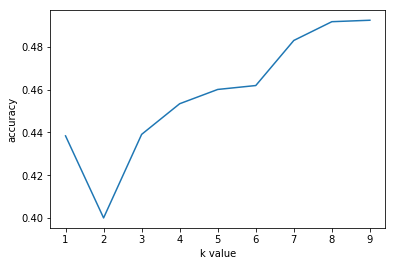

In [51]:
# search for an optimal value of K
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy')))

# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')

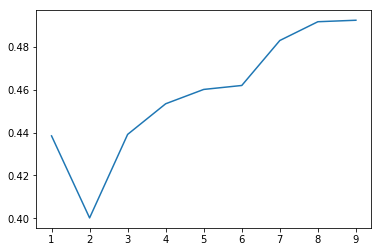

In [53]:
# automatic grid search for an optimal value of K
from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()

In [54]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.492499423033
{'n_neighbors': 9}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


The best k value 9 for this data set. So we can run a new model using 9 neighbors.

In [55]:
# develop a new knn model with k = 9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [56]:
#Model evaluation
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))

0.6115384615384616
[[  0  20  30   0]
 [  0 114 204   1]
 [  0 114 680   5]
 [  0  18 113   1]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        50
          2       0.43      0.36      0.39       319
          3       0.66      0.85      0.74       799
          4       0.14      0.01      0.01       132

avg / total       0.53      0.61      0.55      1300



This model is signficantly more accurate than the knn model that only uses k=3. It is 61.2% accurate

Now it can be evaluated wtih cross-fold validation.

In [60]:
# evaluate the knn model using 10-fold cross-validation
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.57931034 0.48735632 0.5483871  0.58294931 0.51612903 0.47113164
 0.31408776 0.52193995 0.43387471 0.46867749]
0.4923843661979749


On average this model is 49.2% when it is evaluated with cross-validation.

### Logistic Regression

* Logistic Regression uses a non-linear regression model

In [61]:
# evaluate the model by splitting into train and test sets and build a logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# name it as "lr"
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
#evaluate model accuracy
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))

0.6146153846153846
[[  0   0  50   0]
 [  0   0 319   0]
 [  0   0 799   0]
 [  0   0 132   0]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        50
          2       0.00      0.00      0.00       319
          3       0.61      1.00      0.76       799
          4       0.00      0.00      0.00       132

avg / total       0.38      0.61      0.47      1300



In [63]:
# generate class probabilities
probs = lr.predict_proba(X_test)
print probs

[[1.49595070e-02 3.33192049e-01 4.16139806e-01 2.35708639e-01]
 [2.41441632e-01 2.52975834e-01 2.54325854e-01 2.51256681e-01]
 [7.17360109e-03 3.35644510e-01 4.39265601e-01 2.17916287e-01]
 ...
 [1.77466567e-01 2.75261324e-01 2.87332200e-01 2.59939909e-01]
 [7.72596456e-06 3.01735504e-01 6.21059735e-01 7.71970356e-02]
 [3.53182579e-04 3.29814530e-01 5.24230537e-01 1.45601750e-01]]


These columns show us what the model predicts is the probability that each movie will fall into the IMDB score categories
* Movie 1 has a 1.5% chance of being in score category 1
* Movie 1 has a 33.3% chance of being in category 2
* Movie 1 has a 41% chance of being in category 3
* Movie 1 has a 23.6% chance of being in category 4

In [65]:
#check what category this movie is in
df.head(1)

,duration,budget,G,PG,PG-13,R,Comedy,Drama,Thrill_Horror,Bio_Hist_Doc_War,actor_popularity,director_popularity,imdb_cat
0,178.0,237000000.0,0,0,1,0,0,0,0,0,3,1,3


* Movie 1 is in category 3, which had the highest lilkihood for this movie

#### The most accurate classification model that was developed  in this section was the Random Forest Model, which had a prediction rate of 62.5%